**Univariate Analysis**

## Content

- Intro to Matplotlib & Seaborn
- Tencent Use Case
- Anatomy of Matplotlib
- Components of a Matplotlib plot
- Univariate Data Visualization
  - Categorical
    - Bar chart
    - Countplot
    - Pie chart
  - Continous
    - Histogram
    - KDE plot
    - Box and Whiskers plot

---

### Plots Presentation:

https://docs.google.com/presentation/d/1DkLTjTe6YmGbDHtr4v9Jso553DlCuP3cfSnwvUN1mgE/edit?usp=sharing

 **Importing Matplotlib & seaborn**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

---

Before we dive into learning these libraries, lets answer some general questions.

#### Why do even we need to visualize data?

- **Exploratory**  - I can’t see certain patterns just by crunching numbers (avg, rates, %ages).
- **Explanatory** -  I have the numbers crunches and insights ready, but I’d like a visual art for storytelling.

#### What do we already know?

**Data**
- Rows: Samples, Data-points, Records
- Columns: Features, Variables

At the fundamental level, we have two types of data:
- Numerical/Continous
- Categorical

Categorical can be further divided into:
  - **Ordinal:** Categorical data with an order (e.g. low, medium, high)
  - **Non-ordinal/nominal:** Categorical data without any order (e.g. Male/Female)


---

### Video Games Analysis

You are a Data Scientist at "Tencent Games".

You need to analyze what kind of games the company should create in order to perform better in the market.


In [6]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2025-10-10 04:07:24--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 52.85.30.49, 52.85.30.210, 52.85.30.42, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|52.85.30.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.05s   

2025-10-10 04:07:24 (41.3 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


Notice that,
- columns like `Platform`, `Genre` are Categorical
- columns like `NA_Sales`, `Global_Sales`, `Rank` are Continuous

Furthermore,
- `Platform` is of nominal type (no proper order between the categories)
- `Year` is of ordinal type (an order exists between the categories)

---

### Univariate Data Visualization - Categorical Data

**What kind of questions we may want to ask for a categorical variable?**

- What is the Distribution/Frequency of the data across different categories?
- What proportion does a particular category constitutes?

<!-- - What are the top-5 most popular genre of games played?
- Or distribution of sales across various parts of the world? -->

...and so on



Let's take the categorical column "Publisher".

**How can we find the top-5 Publishers?**

In [21]:
cat_counts = data['Publisher'].value_counts()

print(cat_counts)

Publisher
Electronic Arts                 1351
Activision                      1014
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Intergrow                          1
Takuyo                             1
Origin Systems                     1
Michaelsoft                        1
MediaQuest                         1
Name: count, Length: 578, dtype: int64


**What kind of plot can we use to visualize this information?**

- We can perhaps plot categories on X-axis and their corresponding frequencies on Y-axis.
- This is called a `Bar Chart` or a `Count Plot`.

### Bar Chart

- We can draw a bar plot using `plt.bar()`.
- The data is binned here into categories.

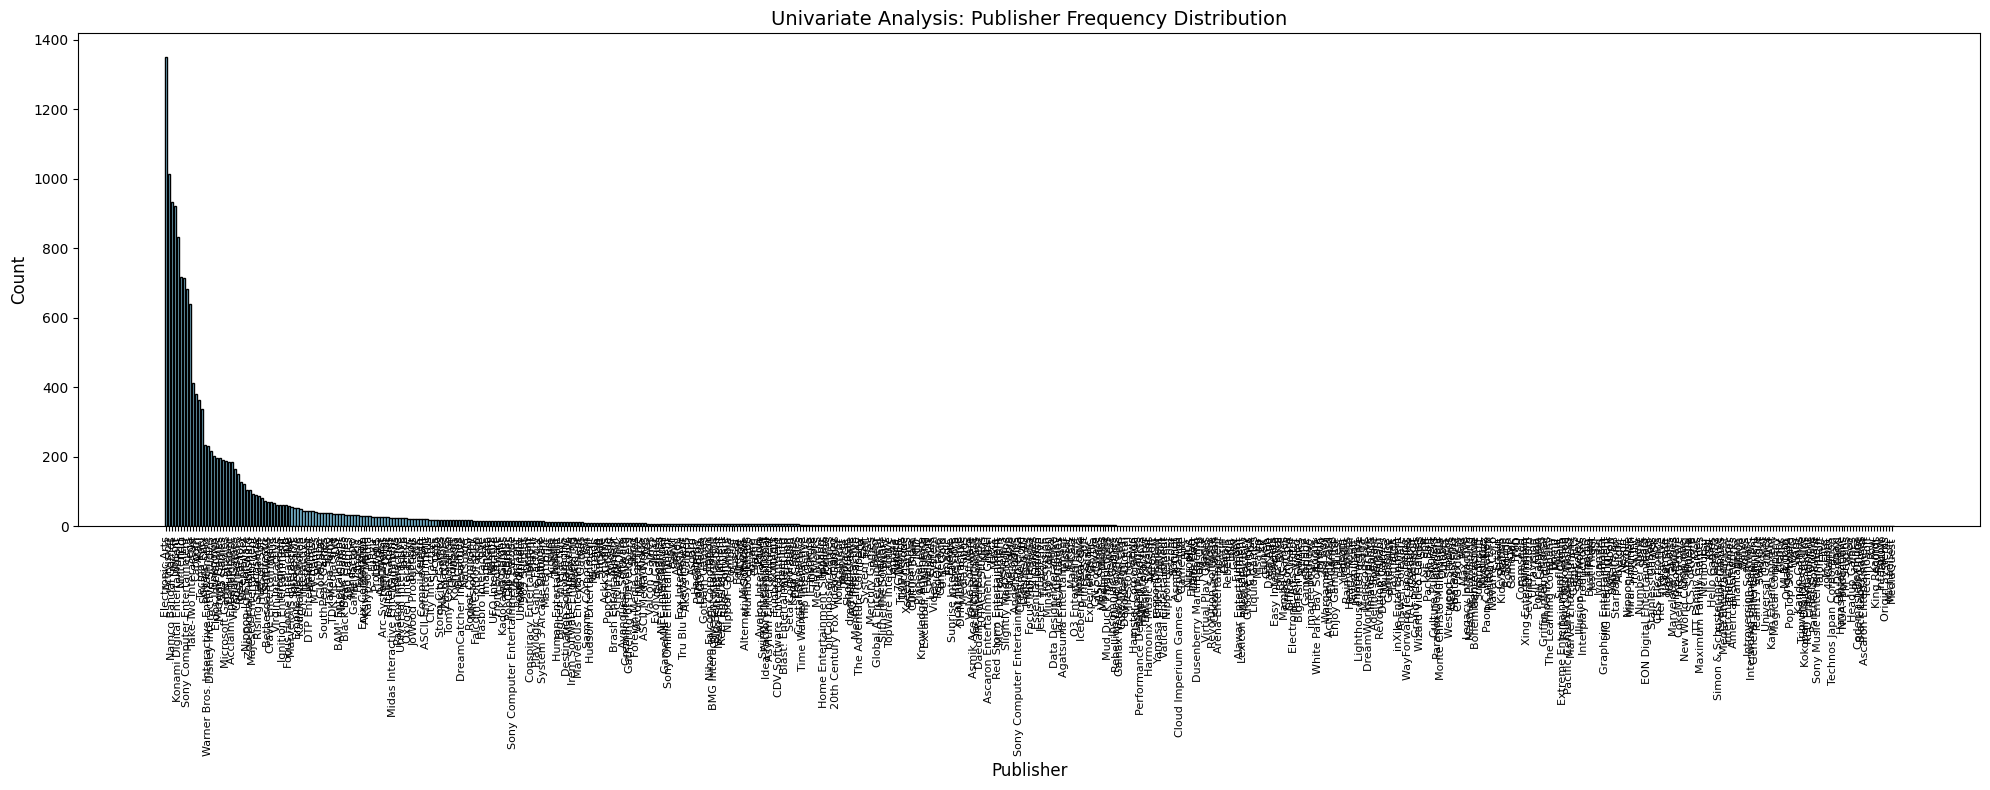

In [24]:
x_bar = cat_counts.index
y_bar = cat_counts.values

plt.figure(figsize=(20, 8))
plt.bar(x_bar, y_bar, color='skyblue', edgecolor='black')
plt.title('Univariate Analysis: Publisher Frequency Distribution', fontsize=14)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

The names seem to be overlapping.

**How can we handle overlapping labels?**
1. Decrease the font size (not preferred)
2. Increase the figure size
3. Rotate the labels

**How can we change the plot size?**

We will select the publishers with more than 100 publications

In [30]:
cat_counts = data['Publisher'].value_counts()
filtered_publishers = cat_counts[cat_counts > 100]

print(f"Total publishers with >100 publications: {len(filtered_publishers)}")
print(filtered_publishers)


Total publishers with >100 publications: 29
Publisher
Electronic Arts                           1351
Activision                                1014
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
Nintendo                                   718
THQ                                        715
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Micros

Plot the filtered bar chart

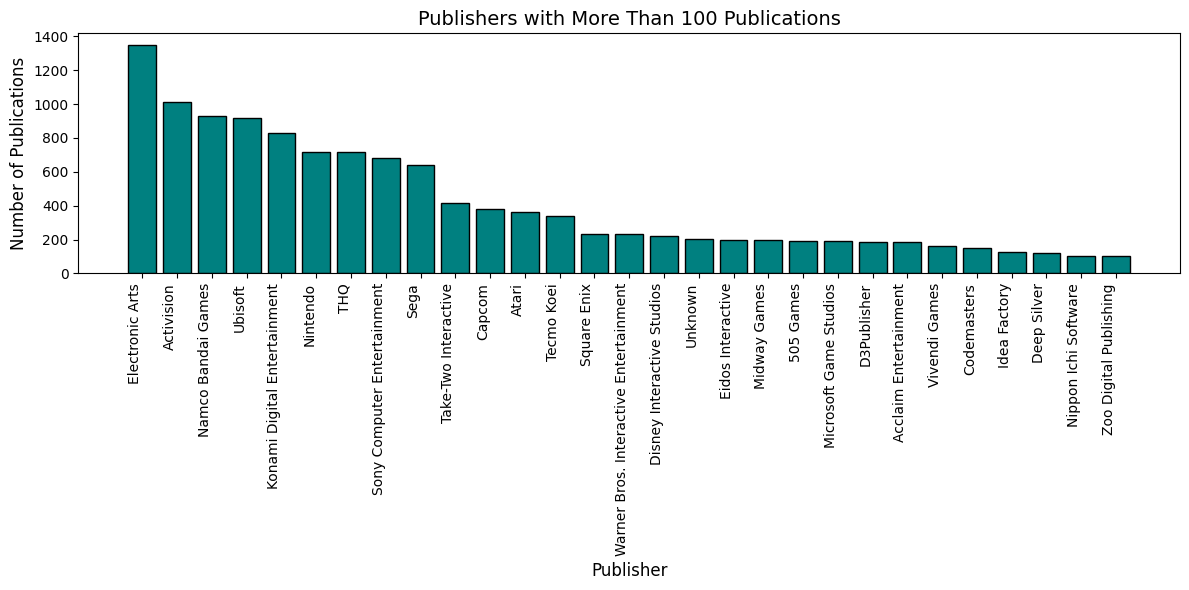

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_publishers.index, filtered_publishers.values, color='teal', edgecolor='black')
plt.title('Publishers with More Than 100 Publications', fontsize=14)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**How can we draw a bar chart in Seaborn?**

- In Seaborn, the same plot is called a **countplot**.
- It automatically does the counting of frequencies for you.

**Why not just call it a barplot?**

There is another function in Seaborn called a **barplot** which has some other purpose. We'll discuss this later.

**Summary and Reflection on Bar Chart/Countplot:**

- **Findings:** The bar chart/countplot revealed the frequency distribution of publishers in the dataset. We observed that a few publishers dominate the market with a significantly higher number of publications. Filtering the data to show publishers with more than 100 publications provided a clearer view of the major players.
- **Questions Addressed:** This plot helped answer questions like "Which are the top publishers?", "How many games has each publisher released?", and "What is the distribution of game releases across different publishers?".
- **How it Helped:** The bar chart/countplot was effective in quickly identifying the most prolific publishers and understanding the concentration of game releases among them. It provided a clear visual comparison of the counts for each category.

### Pie Chart

**What if instead of actual frequencues, we want see the proportion of the categories?**

Say, we want to compare the distrubution/proportion of sales across different regions?

Which plot can we use for this? A pie-chart!

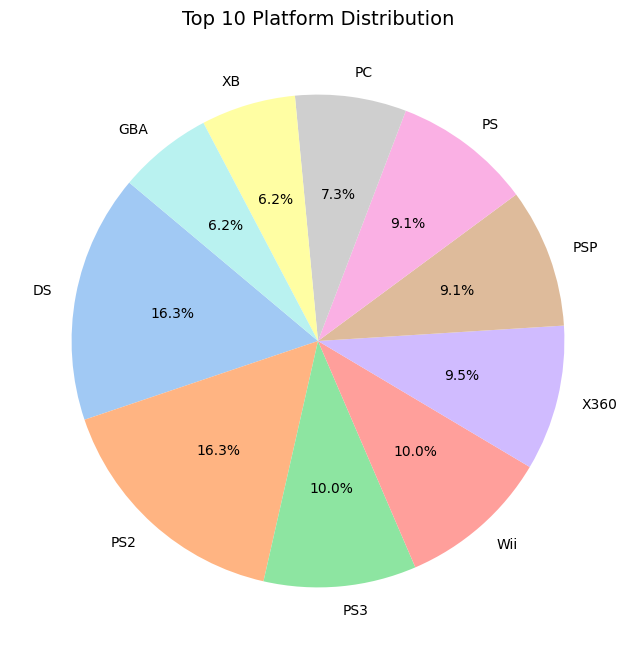

In [35]:
platform_counts = data['Platform'].value_counts()
top_platforms = platform_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_platforms.values, labels=top_platforms.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Platform Distribution', fontsize=14)
plt.show()

**Summary and Reflection on Pie Chart:**

- **Findings:** The pie chart visualized the proportion of game releases across the top 10 platforms. This showed which platforms have the largest share of the market in terms of the number of games released on them.
- **Questions Addressed:** This plot helped answer questions like "What is the market share of the top gaming platforms?", and "How do the top platforms compare in terms of the proportion of games released?".
- **How it Helped:** The pie chart was useful for understanding the relative distribution of game releases across different platforms, providing a clear picture of which platforms are most popular among developers.

---

### Univariate Data Visualisation - Numerical Data

**What kind of questions we may have regarding a numerical variable?**

- How is the data distributed?
- Is the data skewed? Are there any outliers?
- How much percentage of data is below/above a certain number?
- Statistics like - Min, Max, Mean, Median, etc.

Now say you want to find the distribution of games released every year.

Unlike barplot, to see the distribution here we will have to `bin` the data.

**How can we understand popularity of video games year by year?**

### Histogram

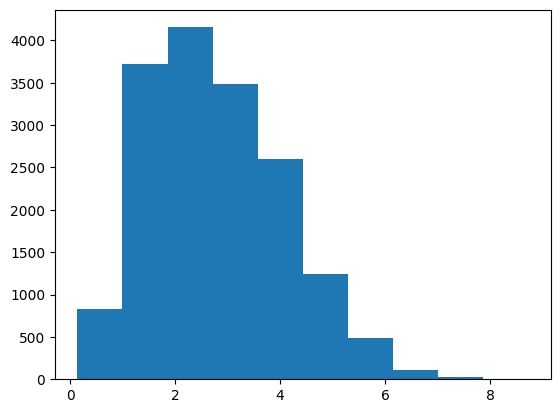

In [37]:
plt.hist(data['NA_Sales'])
plt.show()

If you notice, histograms are basically frequency charts.

We can also vary the number of bins. **The default number of bins is 10**

If we want to see this data per decade, we would need 40 years in 4 bins.

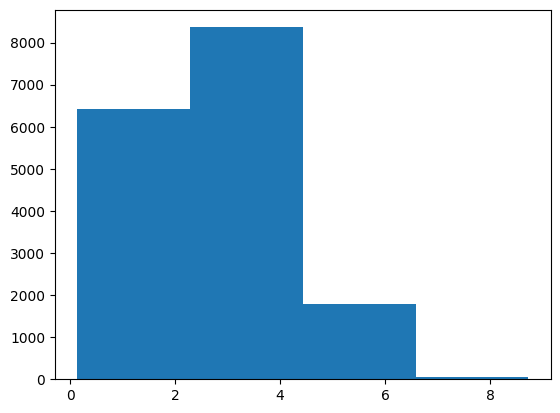

In [38]:
plt.hist(data['NA_Sales'], bins=4)
plt.show()

We can also get the data of each bin, such as range of the boundaries, values, etc.

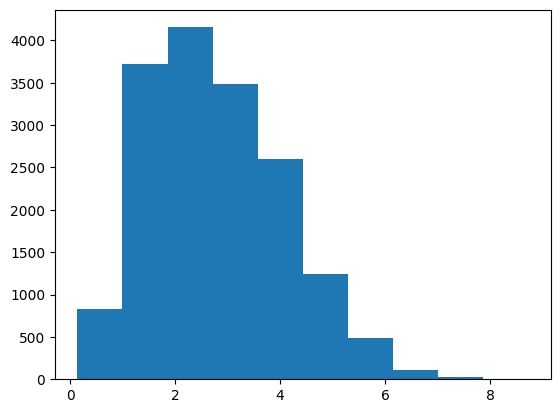

In [39]:
count, bins, _ = plt.hist(data['NA_Sales'])

In [40]:
count

array([8.270e+02, 3.726e+03, 4.155e+03, 3.484e+03, 2.600e+03, 1.241e+03,
       4.860e+02, 1.060e+02, 2.300e+01, 4.000e+00])

In [41]:
bins

array([0.14      , 0.99854524, 1.85709049, 2.71563573, 3.57418097,
       4.43272622, 5.29127146, 6.1498167 , 7.00836195, 7.86690719,
       8.72545243])

**What do these `count` and `bins` mean?**

- **bins** provides bin edges
- **counts** provides it corresponding counts

**What is the length of `count`?**
- 10

**What shoud be the length of `bins`?**
- 10 + 1 = 11

**How can we plot a histogram in Seaborn?**

<Axes: xlabel='NA_Sales', ylabel='Count'>

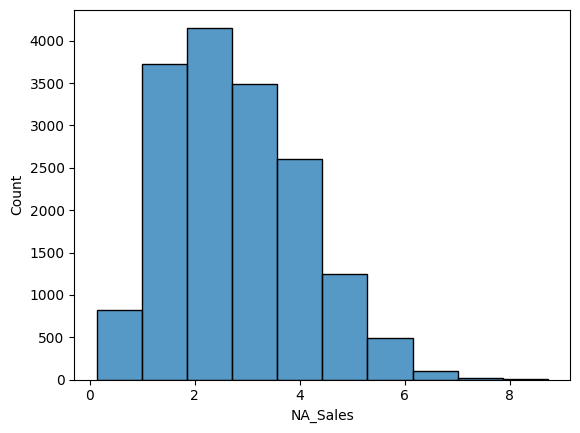

In [42]:
sns.histplot(data['NA_Sales'], bins=10)

Notice that,
- The boundaries are more defined than matplotlib's plotting.
- The x and y axis are labelled automatically.

**Summary and Reflection on Histogram:**

**How is the data distributed?**
 The data is heavily concentrated towards lower sales values and has a long tail extending to higher values.
**Is the data skewed? Are there any outliers?**
 Yes, the data is skewed to the right. The long tail indicates the presence of outliers, which are games with exceptionally high sales compared to the majority.
**How much percentage of data is below/above a certain number?**
 Statistics like - Min, Max, Mean, Median, etc. While the histogram visually shows the distribution and gives an idea of the range where most data lies, it doesn't directly provide exact percentages of data below or above a specific number, nor does it give precise statistics like the mean or median. You would need to calculate these separately using functions like .describe() on the sales column of the DataFrame.

---

### Kernel Density Estimate (KDE) Plot

- A KDE plot, similar to histrogram, is a method for visualizing the distributions.
- But instead of bars, KDE represents data using a **continuous probability density curve**.

**Why do we even need KDE plots?**

- Compared to histogram, KDE produces a plot which is **less cluttered** and **more interpretable**.
- Think of it as a **smoothened version** of a histogram.

\
Let's plot KDE using `seaborn`'s `kdeplot`.

<Axes: xlabel='NA_Sales', ylabel='Density'>

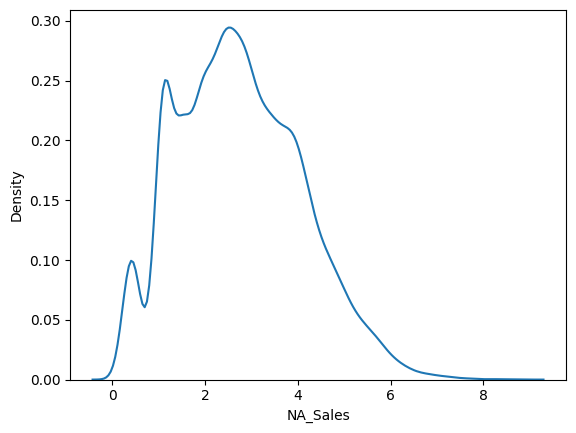

In [43]:
sns.kdeplot(data['NA_Sales'])

**Can you notice the difference between KDE plot and histogram?**

The Y-axis has **probability density estimation** instead of count.

You can read more about this on:
- https://en.wikipedia.org/wiki/Kernel_density_estimation
- https://www.youtube.com/watch?v=DCgPRaIDYXA



**Summary and Reflection on KDE Plot:**

- **Findings:** The KDE plot provided a smoothed representation of the sales distribution, similar to a histogram but using a continuous curve. This offered a less cluttered view of the distribution and highlighted the areas of highest probability density.
- **Questions Addressed:** This plot helped in understanding the overall shape and density of the sales distribution in a continuous manner.
- **How it Helped:** The KDE plot provided a more refined view of the distribution compared to a histogram, which can be particularly useful for identifying modes and understanding the underlying distribution without the binning artifacts of a histogram.

---

### Boxplot

**What if we want to find the aggregates like median, min, max and percentiles of the data.**

Say I want the typical earnings of a game when it is published.

**What kind of plot can we use here?** Boxplot

**What exactly is a Box plot?**

- A box plot or **box and whiskers plot** shows the **distribution of quantitative data**.
- It facilitates comparisons between
  - attributes
  - across levels

of a categorical attribute.

- The **box** shows the **quartiles** of the dataset.
- The **whiskers** show the **rest of the distribution**.
- Except for points that are determined to be **"outliers"** using a method that is a function of the **inter-quartile range**.

Let's go through the terminology one-by-one.

<!-- #### What's a quartile? -->

<!-- - Box plot shows distribution of numerical data and skewness through displaying the **data percentiles**, called **quartiles**. -->

#### Box plots show the five-number summary of data:
1. Minimum score
2. First (lower) quartile
3. Median
4. Third (upper) quartile
5. Maximum score

##### 1. Minimum Score
- It is the **lowest value**, excluding outliers.
- It is shown at the **end of bottom whisker**.

#### 2. Lower Quartile
- **25% of values** fall below the lower quartile value.
- It is also known as the **first quartile**.

##### 3. Median
- Median marks the **mid-point of the data**.
- It is shown by the **line that divides the box into two parts**.
- **Half the scores are greater than or equal to this value and half are less**.
- It is sometimes known as the **second quartile**.

##### 4. Upper Quartile
- **75% of values** fall below the upper quartile value.
- It is also known as the **third quartile**.

#### Maximum Score
- It is the **highest value**, excluding outliers.
- It is shown at the **end of upper whisker**.

#### Whiskers
- The upper and lower whiskers represent **values outside the middle 50%**.
- That is, the **lower 25% of values** and the **upper 25% of values**.

#### Interquartile Range (or IQR)
- This is the box plot showing the **middle 50% of scores**.
- It is the **range between the 25th and 75th percentile**.

\
**Let's plot a box plot to find the average typical earnings for a game.**

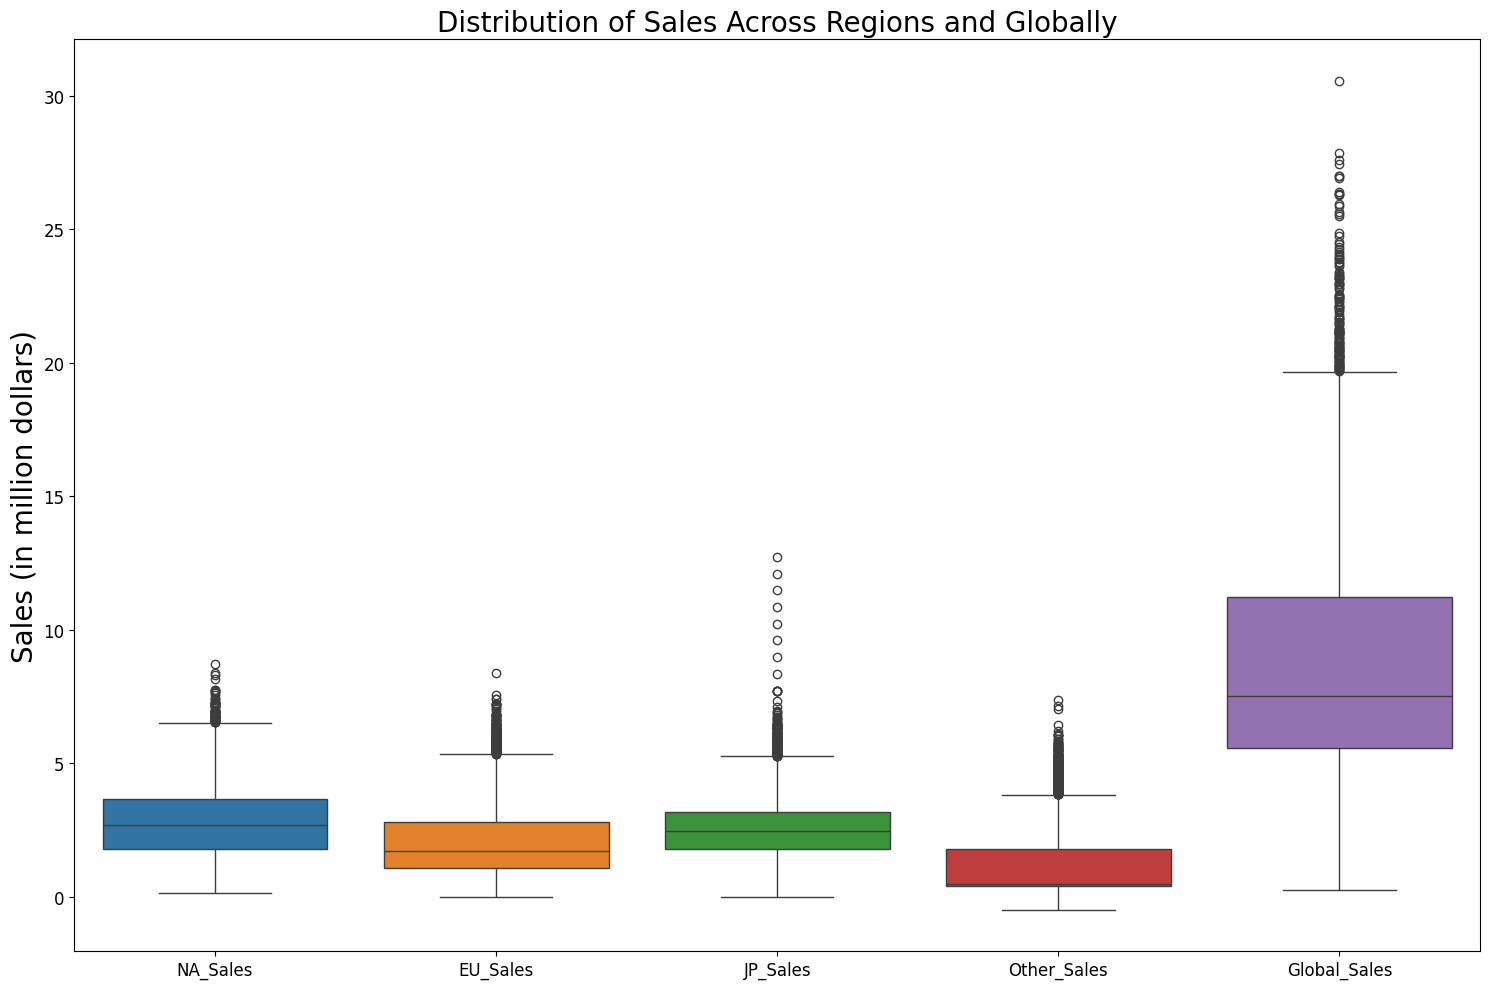

In [45]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(15, 10))
sns.boxplot(data=data[sales_cols])
plt.ylabel('Sales (in million dollars)', fontsize=20)
plt.title('Distribution of Sales Across Regions and Globally', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Summary of Sales Distribution:**

The box plots above show the distribution of sales across different regions (North America, Europe, Japan, and Other) and globally.

- **Median Sales:** The median sales are relatively low across all regions and globally, indicated by the line within each box.
- **Interquartile Range (IQR):** The box represents the IQR, showing the middle 50% of sales data. This gives an idea of the typical range of sales for games in each category.
- **Whiskers:** The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the box.
- **Outliers:** The points beyond the whiskers are considered outliers, representing games with exceptionally high sales. These are particularly prominent in Global Sales and NA_Sales, suggesting a few highly successful games skew the distribution.

Overall, the box plots highlight that while most games have relatively modest sales, there are significant outliers with very high sales, especially in North America and globally.

---

### **Question-1**

Q. For analyzing marks given by an edtech company, we want to find the range in which the most number of students have scored.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Histogram

c. Countplot

d. Line Plot
```

Answer: Histogram

Explanation:

A histogram provides a visual representation of the distribution of numerical data, divided into intervals called bins. It allows you to see the frequency or count of data points within each bin, making it ideal for identifying the range in which the most number of students have scored. By observing the peak(s) in the histogram, you can easily determine the range(s) with the highest frequency of scores.

---

### **Question-2**

Q. The telecom company "Airtel" wants to find the count customers across different payment modes opted by the customer.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Countplot

c. Line Plot

d. Boxplot
```

Answer: Count Plot

Explanation:

A countplot is specifically designed for visualizing the count of observations in each category of a categorical variable. In this case, the payment modes are categorical variables, and the countplot will provide a clear representation of the number of customers using each payment mode. This makes it ideal for comparing the distribution of customers across different payment modes.

---

### **Question-3**

Q. In the state “Haryana”, we want to find the proportion of people who smoke.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Bar Chart

c. Countplot

d. Boxplot
```

Answer: Pie Chart

Explanation:

A pie chart is an effective way to represent proportions or percentages within a whole. In this case, the proportion of people who smoke can be represented as a fraction of the entire population of "Haryana". Each section of the pie chart would represent a different category, such as smokers and non-smokers, allowing for a clear visual comparison of the proportion of smokers in the population.

---